# Study of EGamma SuperCluster energy correction for hgcal

In [1]:
%load_ext autoreload
%autoreload 1
import ROOT
import JupyROOT.helpers.utils
JupyROOT.helpers.utils.GetGeometryDrawer = lambda:None
import cppyy
from DataFormats.FWLite import Handle
import hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import sys
sys.path.append("..")
import edmReader.pythonizations
%aimport edmReader.edmReader
from edmReader.edmReader import EdmReader, MultiEdmReader

Welcome to JupyROOT 6.26/11


In [2]:
ntuples = list(range(1, 20))
comp = MultiEdmReader([f"/home-hgcal/supercls/scratch/v3-1d9a7-mustache/step3_{idx}.root" for idx in ntuples],
                      [f"/home-hgcal/supercls/scratch/v3-1d9a7-dnn/step3_{idx}.root" for idx in ntuples])

cling::DynamicLibraryManager::loadLibrary(): libcuda.so.1: cannot open shared object file: No such file or directory
Error in <TInterpreter::TCling::AutoLoad>: failure loading library libSimTrackerTrackTriggerAssociation.so for map<string,ULong64_t>
cling::DynamicLibraryManager::loadLibrary(): libcuda.so.1: cannot open shared object file: No such file or directory
Error in <TInterpreter::TCling::AutoLoad>: failure loading library libSimTrackerTrackTriggerAssociation.so for map<edm::Ref<edmNew::DetSetVector<TTCluster<edm::Ref<edm::DetSetVector<Phase2TrackerDigi>,Phase2TrackerDigi,edm::refhelper::FindForDetSetVector<Phase2TrackerDigi> > > >,TTCluster<edm::Ref<edm::DetSetVector<Phase2TrackerDigi>,Phase2TrackerDigi,edm::refhelper::FindForDetSetVector<Phase2TrackerDigi> > >,edmNew::DetSetVector<TTCluster<edm::Ref<edm::DetSetVector<Phase2TrackerDigi>,Phase2TrackerDigi,edm::refhelper::FindForDetSetVector<Phase2TrackerDigi> > > >::FindForDetSetVector>,vector<edm::Ptr<TrackingParticle> > >
clin

In [3]:
def filterEndcap(collection, positiveEndcap=True):
    return [obj for obj in collection if (positiveEndcap and obj.eta() > 0) or (not positiveEndcap and obj.eta() < 0)]

In [4]:
comp.events

[[<edmReader.edmReader.EdmReader at 0x7fc30ee383d0>,

In [5]:
evt = comp.events[0][0]
evt.to(0)

True

In [6]:
evt.genParticles[0]

reco::GenParticle(energy=15000.0,charge=0,eta=0.0,pdgId=990,isHardProcess=False)

In [5]:
h_mustache_SC = hist.Hist(hist.axis.Regular(100, 0., 500., name="rawEnergy", label="Raw Mustache SC energy"),
                          hist.axis.Regular(100, 0., 500., name="correctedEnergy", label="Corrected Mustache SC energy"))
h_mustache_SC_sub  = hist.Hist(hist.axis.Regular(100, 0., 500., name="rawEnergy", label="Raw Mustache SC energy"),
    hist.axis.Regular(100, -10, 100., name="corrMinusRawEnergy", label="Corrected - Raw Mustache SC energy"),
                          )

h_mustache_dnn_sc = hist.Hist(hist.axis.Regular(100, 0., 500., name="mustacheEnergy", label="Raw Mustache SC energy"),
                          hist.axis.Regular(100, 0., 500., name="dnnEnergy", label="Raw DNN SC energy"))
h_mustache_dnn_sc_sub  = hist.Hist(hist.axis.Regular(100, 0., 500., name="rawEnergy", label="Raw Mustache SC energy"),
                        hist.axis.Regular(100, -30, 30., name="mustacheMinusDNN", label="Mustache corrected - Raw DNN energy"),
                          )


h_sc_multiplicity = hist.Hist(hist.axis.Integer(0, 5, name="mustacheSCMultiplicity"), hist.axis.Integer(0, 5, name="dnnSCMultiplicity"))

for evt_pair in comp:
    for endcap in [True, False]:
        sc = filterEndcap(evt_pair[0].oldHgcalSuperclusters, endcap)
        dnn_sc = filterEndcap(evt_pair[1].ticlEgammaSuperClusters, endcap)
        h_sc_multiplicity.fill(len(sc), len(dnn_sc))
        if (len(sc) == 1) and (len(dnn_sc) == 1):
            h_mustache_SC.fill(sc[0].rawEnergy(), sc[0].correctedEnergy())
            h_mustache_SC_sub.fill( sc[0].rawEnergy(), sc[0].correctedEnergy() - sc[0].rawEnergy(),)
            h_mustache_dnn_sc.fill(sc[0].rawEnergy(), dnn_sc[0].rawEnergy())
            h_mustache_dnn_sc_sub.fill(sc[0].rawEnergy(), sc[0].correctedEnergy() - dnn_sc[0].rawEnergy())
            #h_mustache_dnn_sc.fill(evt_pair[0].genParticles[1].energy(),evt_pair[1].genParticles[1].energy())

run: 1 lumi: 1 event: 16
run: 1 lumi: 1 event: 4
run: 1 lumi: 1 event: 12
run: 1 lumi: 1 event: 2
run: 1 lumi: 1 event: 11
run: 1 lumi: 1 event: 6
run: 1 lumi: 1 event: 7
run: 1 lumi: 1 event: 18
run: 1 lumi: 1 event: 5
run: 1 lumi: 1 event: 14
run: 1 lumi: 1 event: 9
run: 1 lumi: 1 event: 1
run: 1 lumi: 1 event: 17
run: 1 lumi: 1 event: 13
run: 1 lumi: 1 event: 25
run: 1 lumi: 1 event: 23
run: 1 lumi: 1 event: 22
run: 1 lumi: 1 event: 15
run: 1 lumi: 1 event: 8
run: 1 lumi: 1 event: 3
run: 1 lumi: 1 event: 19
run: 1 lumi: 1 event: 24
run: 1 lumi: 1 event: 28
run: 1 lumi: 1 event: 20
run: 1 lumi: 1 event: 21
run: 1 lumi: 1 event: 27
run: 1 lumi: 1 event: 30
run: 1 lumi: 1 event: 36
run: 1 lumi: 1 event: 32
run: 1 lumi: 1 event: 26
run: 1 lumi: 1 event: 31
run: 1 lumi: 1 event: 29
run: 1 lumi: 1 event: 38
run: 1 lumi: 1 event: 40
run: 1 lumi: 1 event: 43
run: 1 lumi: 1 event: 34
run: 1 lumi: 1 event: 35
run: 1 lumi: 1 event: 41
run: 1 lumi: 1 event: 44
run: 1 lumi: 1 event: 42
run: 1 lu

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fe2b7444040>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fe2b7078130>, text=[])

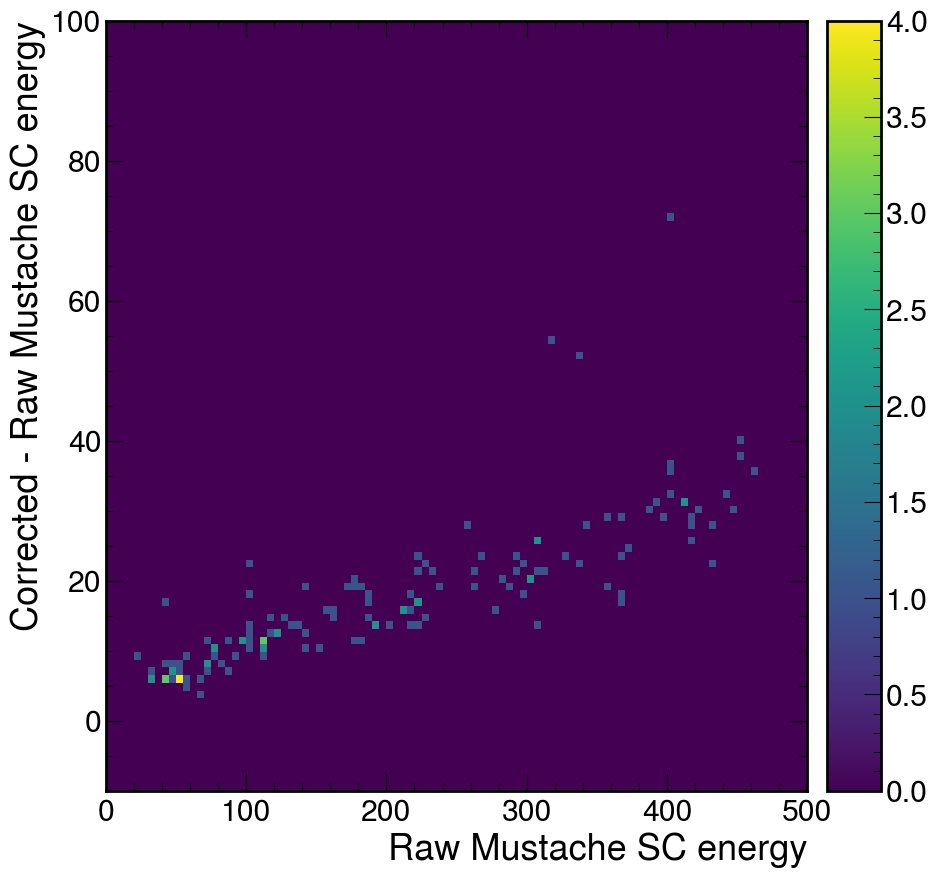

In [38]:
hep.hist2dplot(h_mustache_SC_sub)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fe2b67f1fd0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fe2b68019d0>, text=[])

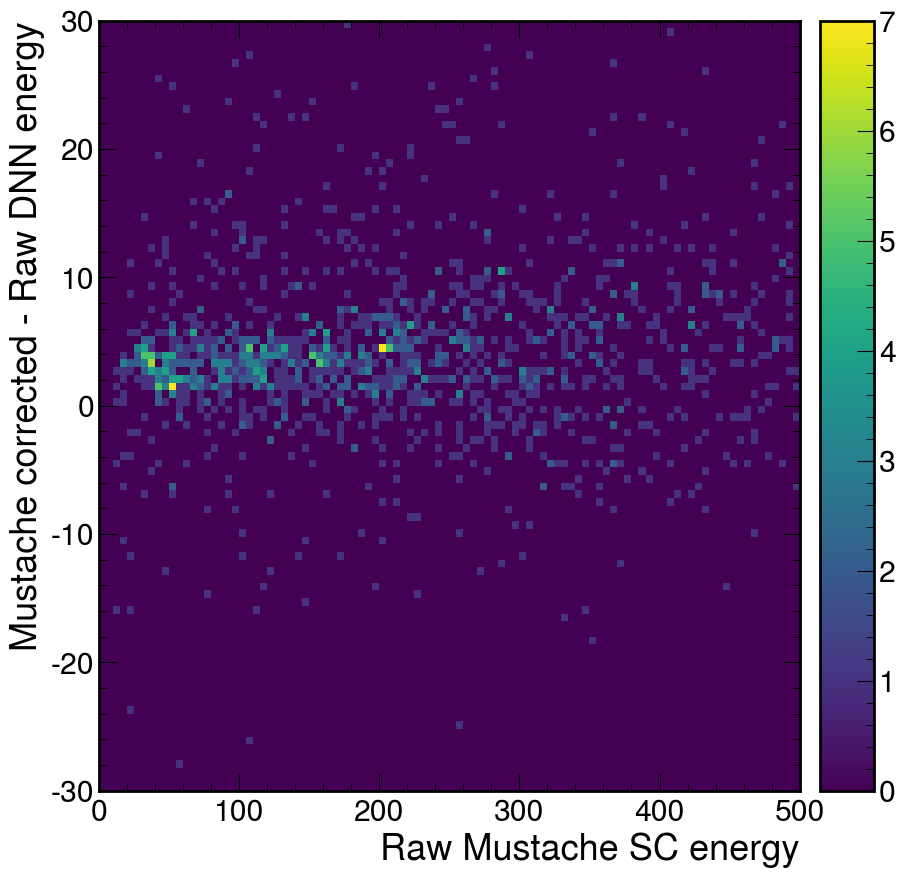

In [46]:
hep.hist2dplot(h_mustache_dnn_sc_sub)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fe2b73cd070>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fe2b6a6ae50>, text=[])

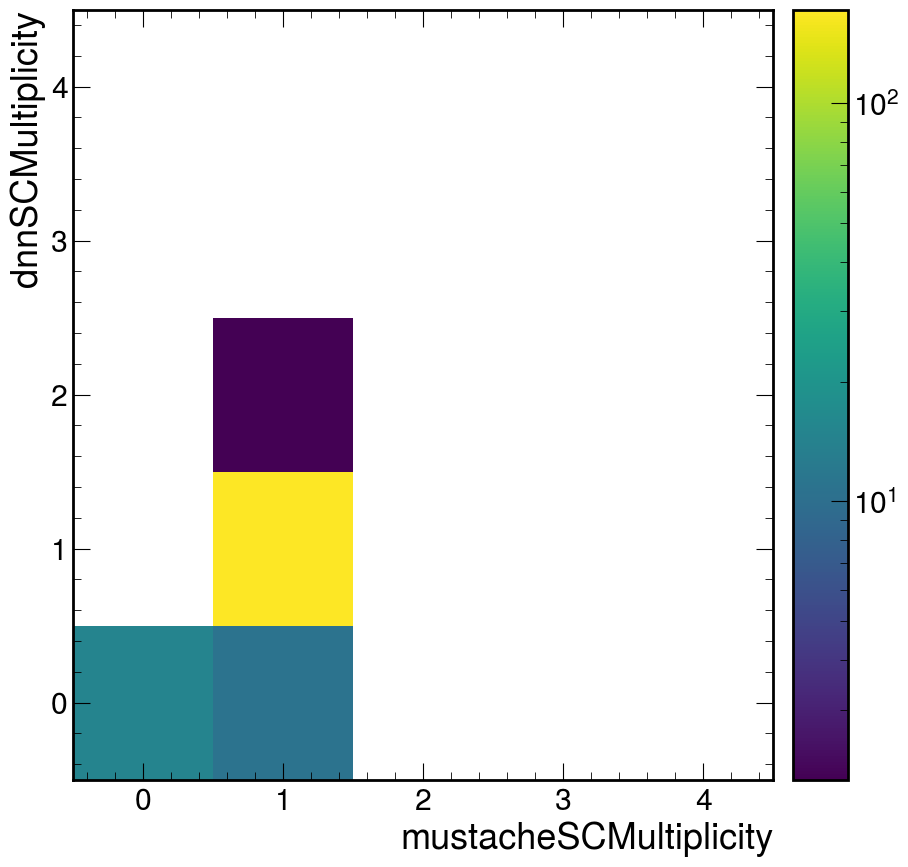

In [41]:
import matplotlib
hep.hist2dplot(h_sc_multiplicity, norm=matplotlib.colors.LogNorm())

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fe2b99bf790>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

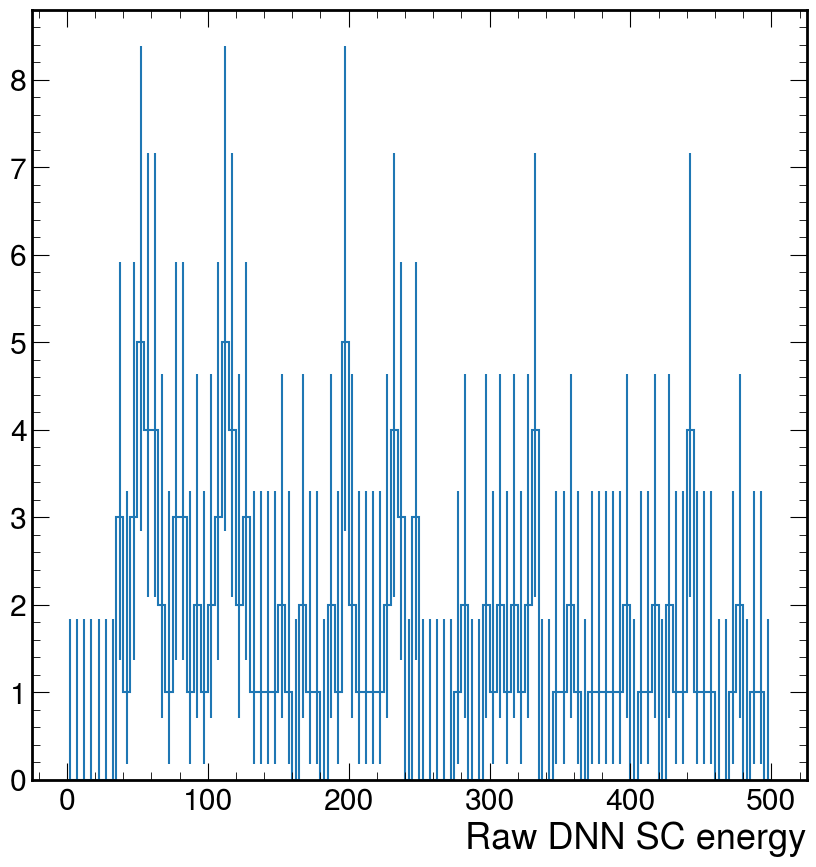

In [13]:
hep.histplot(h_mustache_dnn_sc.project("dnnEnergy"))

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fe2b698d0d0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fe2b74d3760>, text=[])

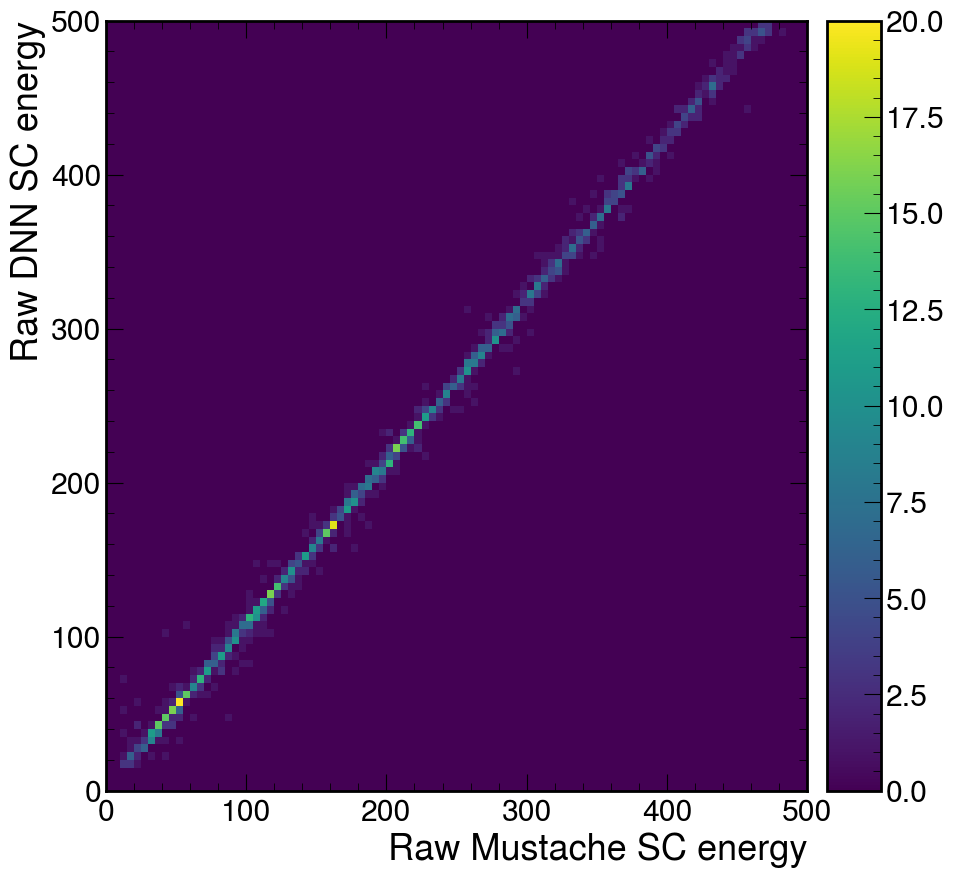

In [47]:
hep.hist2dplot(h_mustache_dnn_sc)

Text(0, 1, 'Average DNN supercluster raw energy')

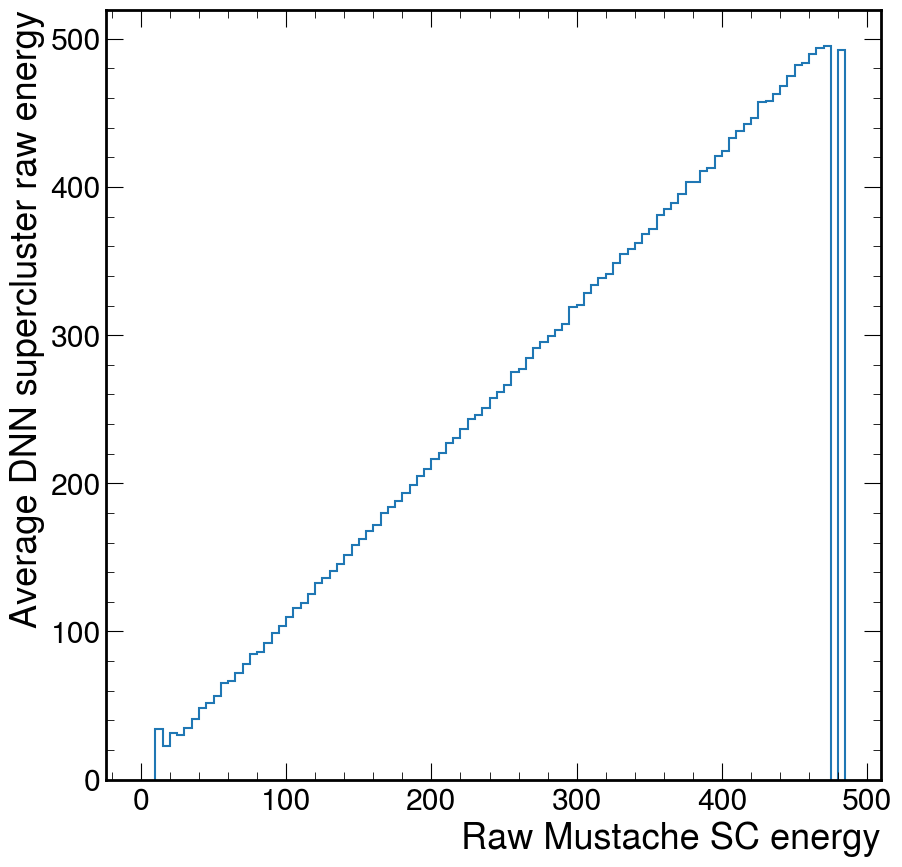

In [53]:
hep.histplot(h_mustache_dnn_sc.profile(1), yerr=False)
plt.ylabel("Average DNN supercluster raw energy")

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fe2b67afee0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fe28931cac0>, text=[])

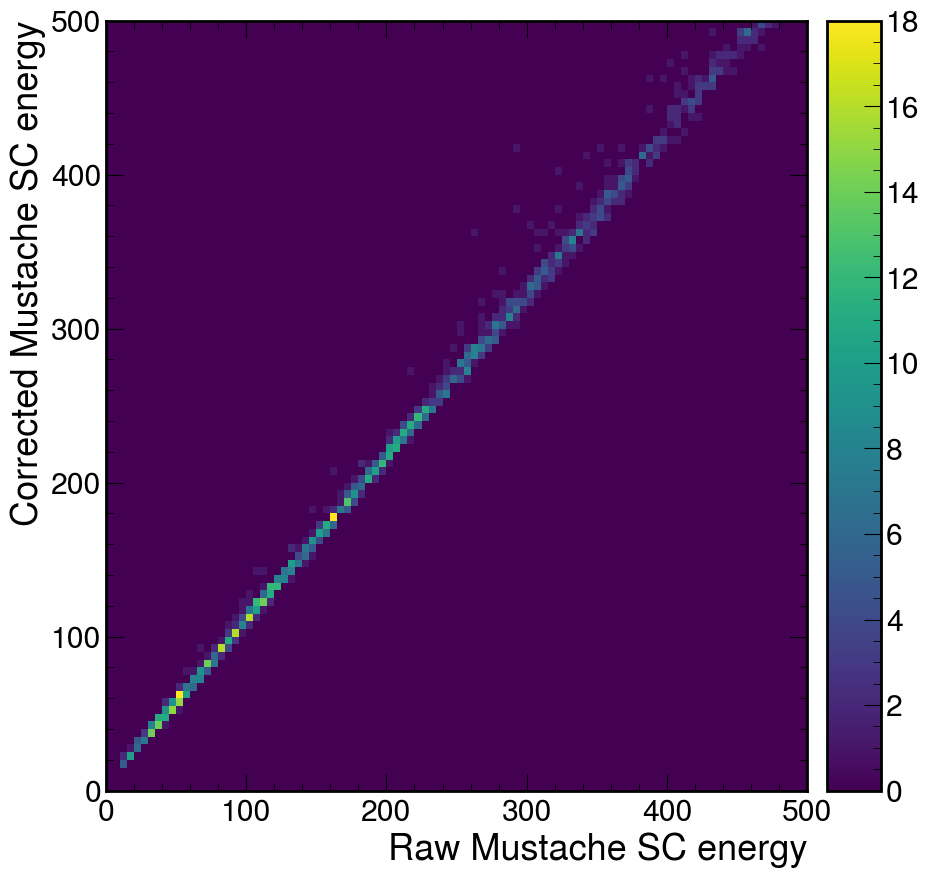

In [48]:
hep.hist2dplot(h_mustache_SC)

## Finding inefficient events

### Looking one-by-one

In [8]:
evt_iter = iter(comp)

In [9]:
while True:
    evt_pair = next(evt_iter)
    for endcap in [True, False]:
        sc = filterEndcap(evt_pair[0].oldHgcalSuperclusters, endcap)
        dnn_sc = filterEndcap(evt_pair[1].ticlEgammaSuperClusters, endcap)
        if len(sc) == 1 and len(dnn_sc) == 0:
            break
    else:
        continue
    break

run: 1 lumi: 1 event: 14
run: 1 lumi: 1 event: 2
run: 1 lumi: 1 event: 5


In [10]:
sc = filterEndcap(evt_pair[0].oldHgcalSuperclusters, endcap)
dnn_sc = filterEndcap(evt_pair[1].ticlEgammaSuperClusters, endcap)

In [12]:
sc

[reco::SuperCluster(energy=15.687461241485256,rawEnergy=12.66165828704834,correctedEnergy=15.687461241485256,clustersSize=2,eta=1.8674205491921734,algo=1000,caloID=CaloID: 0,seed=<cppyy.gbl.edm.Ptr<reco::CaloCluster> object at 0x3502e8a8>)]

In [14]:
evt_pair[0].genParticles[1].pt()

5.205848217010498

### Histograms

In [20]:
h_genEnergy_dnnFail = hist.Hist(hist.axis.Regular(100, 0., 500., name="genEnergy", label="GenENergy"))
for evt_pair in comp:
    for endcap in [True, False]:
        sc = filterEndcap(evt_pair[0].oldHgcalSuperclusters, endcap)
        dnn_sc = filterEndcap(evt_pair[1].ticlEgammaSuperClusters, endcap)
        if len(sc) == 1 and len(dnn_sc) == 0:
            genPart = filterEndcap(evt_pair[0].genParticles, endcap)[0]
            h_genEnergy_dnnFail.fill(genPart.pt())

run: 1 lumi: 1 event: 16
run: 1 lumi: 1 event: 4
run: 1 lumi: 1 event: 12
run: 1 lumi: 1 event: 2
run: 1 lumi: 1 event: 11
run: 1 lumi: 1 event: 6
run: 1 lumi: 1 event: 7
run: 1 lumi: 1 event: 18
run: 1 lumi: 1 event: 5
run: 1 lumi: 1 event: 14
run: 1 lumi: 1 event: 9
run: 1 lumi: 1 event: 1
run: 1 lumi: 1 event: 17
run: 1 lumi: 1 event: 13
run: 1 lumi: 1 event: 25
run: 1 lumi: 1 event: 23
run: 1 lumi: 1 event: 22
run: 1 lumi: 1 event: 15
run: 1 lumi: 1 event: 8
run: 1 lumi: 1 event: 3
run: 1 lumi: 1 event: 19
run: 1 lumi: 1 event: 24
run: 1 lumi: 1 event: 28
run: 1 lumi: 1 event: 20
run: 1 lumi: 1 event: 21
run: 1 lumi: 1 event: 27
run: 1 lumi: 1 event: 30
run: 1 lumi: 1 event: 36
run: 1 lumi: 1 event: 32
run: 1 lumi: 1 event: 26
run: 1 lumi: 1 event: 31
run: 1 lumi: 1 event: 29
run: 1 lumi: 1 event: 38
run: 1 lumi: 1 event: 40
run: 1 lumi: 1 event: 43
run: 1 lumi: 1 event: 34
run: 1 lumi: 1 event: 35
run: 1 lumi: 1 event: 41
run: 1 lumi: 1 event: 44
run: 1 lumi: 1 event: 42
run: 1 lu

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f6f69ee04f0>, errorbar=None, legend_artist=None)]

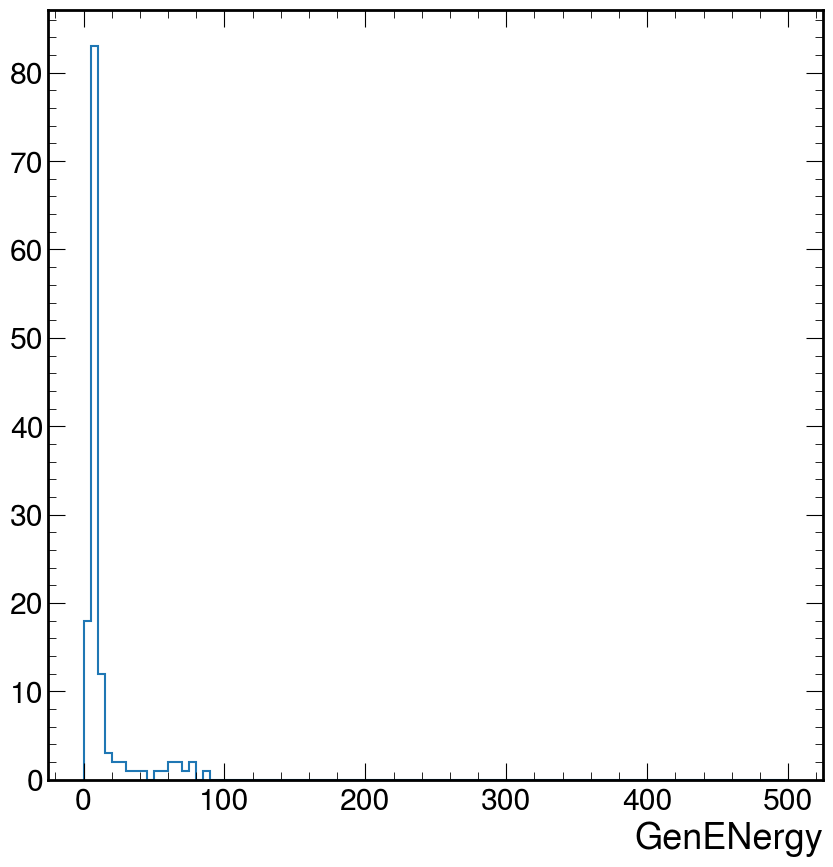

In [21]:
hep.histplot(h_genEnergy_dnnFail, yerr=False)